# Pulse arrival times from the Crab pulsar
## Crab Pulsar Experiment Part 3.2

Use this notebook as a template for Part 3.2 of the Crab pulsar experiment.

In [1]:
# To begin, we import some libraries that we will need later.

# Some handy standard python libraries
import os

# The numpy library is very useful for many things
import numpy as np

# The interpolate library from scipy includes powerful interpolation routines
# including the Lagrange interpolation described in the lab script.
from scipy import interpolate

# Astropy provides many useful tools...
from astropy import coordinates as coord
from astropy import units as u
from astropy import constants as const
from astropy import time as astrotime

# The pyplot module from matplotlib will allow us to plot things.
from matplotlib import pyplot as plt
from math import pi

## Load Data
Here we load your ToA data as well as the file containing solar system barycentre coordinates.

In [2]:
# Specify the file with ToAs you want to work on.
toafile  = "example.txt"
baryfile = "ssb_files/ssb_2022.txt" # ssb_2022 will work for all of 2022.

# Read the barycentre file... Read the numpy loadtxt page to understand what this does...
year, month, day, xpos, ypos, zpos = np.loadtxt(baryfile,unpack=True)

# @todo: Load in your ToAs in a similar way.
# ...

## Interpolation
The Earth-barycentre vector is only given once per day (at 0 UT) in your input file. Therefore you will need to [interpolate](https://en.wikipedia.org/wiki/Interpolation) to get the vector at the time of each of your ToAs.

The below is an example code showing interpolation of a simple sinusoid function. Make sure you understand what this code is doing, then replace it with a function to interpolate your x, y and z positions at the times of your ToAs.

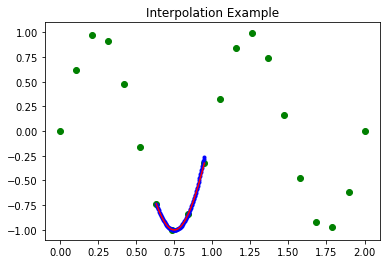

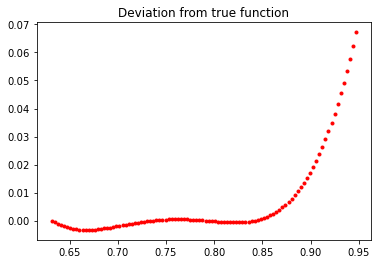

In [3]:
# Interpolation example, interpolating part of a sine function.

# This is the X and Y data points of the sine function
x = np.linspace(start=0,stop=2,num=20)
y = np.sin(2*pi*x)

# We will interpolate using
start_point = 6
interp_number=3

interp_function = interpolate.lagrange(x[start_point:start_point+interp_number],\
                                       y[start_point:start_point+interp_number])

x2 = np.linspace(x[start_point],x[start_point+interp_number],100)
y2 = interp_function(x2)

y3 = np.sin(2*pi*x2)

plt.plot(x,y,'o',color='green')
plt.plot(x2,y2,'.',color='blue')
plt.plot(x2,y3,'-',color='red')
plt.ylim(-1.1,1.1)
plt.title("Interpolation Example")
plt.figure()
plt.plot(x2,y2-y3,'.',color='red')
plt.title("Deviation from true function")
plt.show()


## Compute the Earth delay

This is the delay due to the fact that the observatory is not at the centre of the Earth. For this, you need to know the elevation angle above the horizon (see the lab script for more details).

The [Astropy](http://www.astropy.org/) library provides very powerful tools to do things like coordinate transforms. Here we want to convert from equitorial (RA and Dec) coordinate system to an observatory-based [AltAz](http://docs.astropy.org/en/stable/api/astropy.coordinates.AltAz.html) coordinate system. Make sure you are familiar with these two coordinate systems. The conversion from one to the other requries knowing the location of your telecsope and also the time the observations were taken.

The following libraries have been imported for your convinience:
 * ``astropy.coordinate`` has been imported as ``coord``
 * ``astropy.time`` has been imported as ``astrotime``
 

In [4]:
# Insert the position of the crab pulsar here!
pulsarpos = coord.SkyCoord(ra="01:23:45.6",dec="12:34:56.7",unit=(u.hourangle,u.deg))

#lovellpos = coord.EarthLocation(...)

#times = astrotime.Time(...)

# To compute the angle between the pulsar and the earth we can use astropy to tell us the elevation angle to the pulsar.
# First Transform the coordinate system to an Alt-Az system. This needs the location of the telescope and the times
# of the observation.
# altaz = pulsarpos.transform_to(coord.AltAz(obstime=times,location=lovellpos))


# earth_delay = ...

## Compute the Roemer delay

This is the delay corresponding to the distance of the centre of the Earth to the barycentre.


In [5]:


# psr_x = ...
# psr_y = ...
# psr_z = ...

# roemer_delay = ...

## Residuals from a fixed period model



In [6]:
# The data file includes a sutiable 'guess period' as described in the lab script.
# You can either load the data file or get it from the 'Make Time of Arrivals' notebook.
period_guess = ...


# residual = 

# Do fitting (try the polyfit routine in numpy)